<h1><center>Projet ACV</center></h1>

# Imports

In [9]:
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

import numpy as np
import cv2 # librairie OpenCV

# Filtres statiques

In [10]:
# Conversion de l'image de BGR en RGB

def to_RGB(image):
    """convertit l'image de BGR en RGB"""
    img = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    return img

In [3]:
# Conversion en HSV

def to_HSV(image):
    """convertit l'image de BGR en HSV"""
    img = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    return img

In [36]:
def filtre_miroir_vertic(image):
    '''Applique un filtre miroir à la verticale de l'image entrée en input'''
    
    height, width = image.shape[:2]
    image_miroir = np.zeros((height, width, 3), 'uint8')
    if width %2 != 0:
        demi_image = image[:,:(width//2)+1]
        demi_image_miroir = np.flip(image[:,:(width//2)], axis = 1)
        image_miroir[:,:(width//2)+1] = demi_image
        image_miroir[:,(width//2)+1:] = demi_image_miroir
    else:
        demi_image = image[:,:(width//2)]
        demi_image_miroir = np.flip(demi_image, axis = 1)
        image_miroir[:,:(width//2)] = demi_image
        image_miroir[:,(width//2):] = demi_image_miroir

    return image_miroir

In [5]:
def filtre_miroir_horiz(image):
    '''Applique un filtre miroir à l'horizontale de l'image entrée en input'''
    height, width = image.shape[:2]
    image_miroir = np.zeros((height, width, 3), 'uint8')
    demi_image = image[0:height//2,:]
    demi_image_miroir = np.flip(demi_image, axis = 0)
    image_miroir[0:height//2,:] = demi_image
    image_miroir[height//2:,:] = demi_image_miroir

    return image_miroir

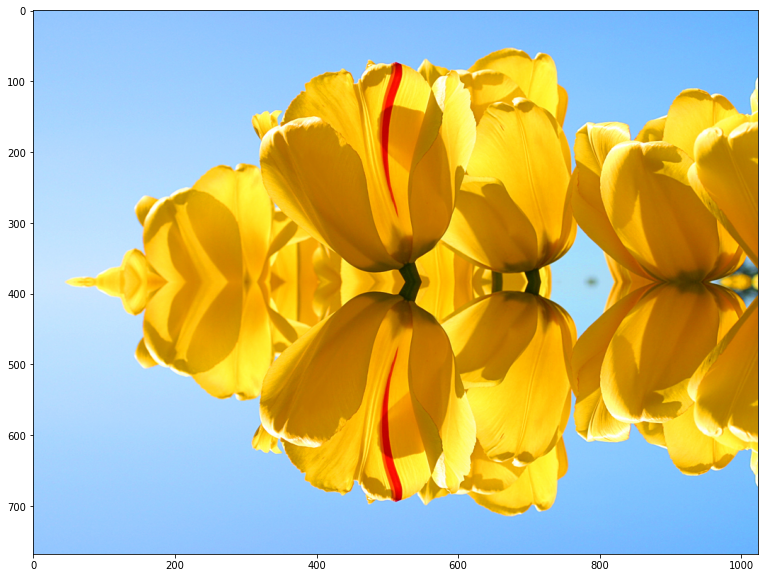

In [8]:
img = plt.imread('../../data/tulips.jpg')

plt.figure()
plt.imshow(filtre_miroir_horiz(img))

In [11]:
def filtre_flou(image):
    '''Applique un filtre flou à l'image entrée en input par flou gaussien'''
    blurred = cv2.GaussianBlur(image,(19,19),0)
    return blurred

In [12]:
def filtre_gray(image):
    '''Transforme l'image entrée en input en échelle de gris'''
    grayscale = np.zeros((image.shape[0], image.shape[1], 3), 'uint8') #création d'une image en 3D vide
    grayscale[:,:,0] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    grayscale[:,:,1] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    grayscale[:,:,2] = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    return grayscale 

In [13]:
def filtre_sepia(image):
    '''Applique un filtre sepia à l'image entrée en input'''
    img_sepia = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    for pixel in img_sepia[:,:,0]:
        pixel[0]=31
    return img_sepia
# NE MARCHE PAS

In [14]:
def filtre_pixel(image):
    """Pixelise l'image"""
    height,width = image.shape[:2]
    img = image[0:height:5, 0:width:5] # le 5 correspond au pas (nb de pixels à sauter)
    img = cv2.resize(img, dsize=(width, height))
    return img

In [73]:
def filtre_cartoon(image):
    """Renvoie l'image avec un effet cartoon"""
    height,width = image.shape[:2]
    tublur = cv2.medianBlur(image, 5)

    edge = cv2.Canny(tublur, 10, 300)
    kernel = np.ones((2,2), np.uint8)
    edge = cv2.dilate(edge, kernel, iterations = 1)
    tublur[edge==255] = 0
    return tublur

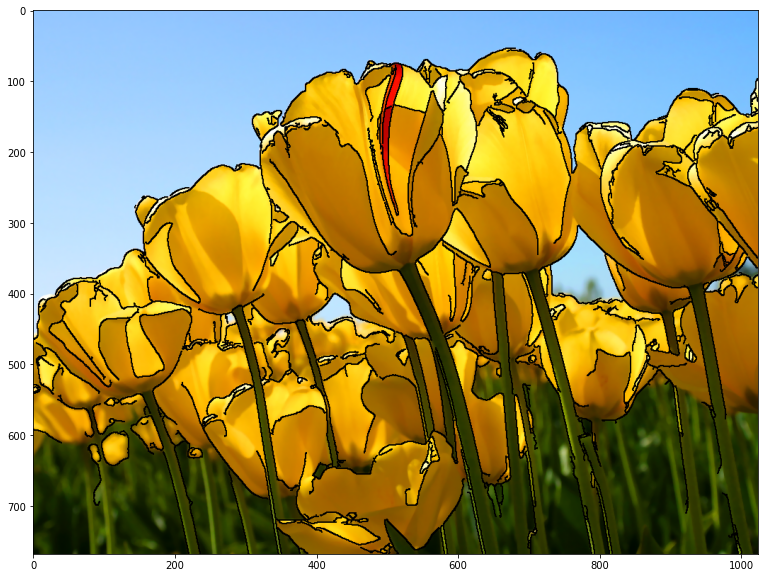

In [74]:
img = plt.imread('../../data/tulips.jpg')

plt.figure()
plt.imshow(filtre_cartoon(tulips))

Text(0.5, 1.0, 'cartoonified')

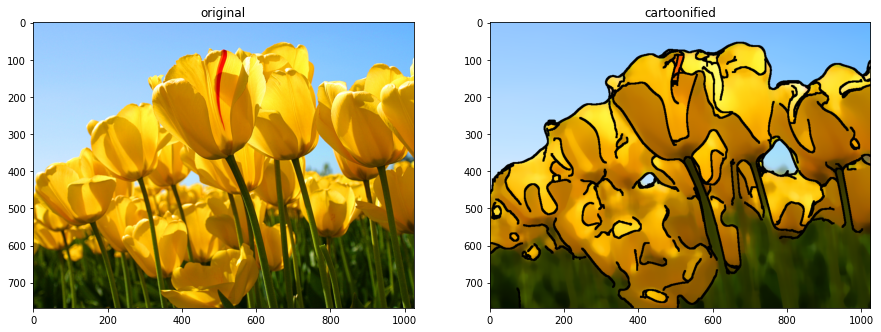

In [17]:
# A IMPLEMENTER EN FONCTION ET TESTER - CARTOON
tulips = plt.imread('../../data/tulips.jpg')
tublur = cv2.medianBlur(tulips, 29)

# We'll cover Canny edge detection and dilation shortly
edge = cv2.Canny(tublur, 10, 150)
kernel = np.ones((5,5), np.uint8)
edge = cv2.dilate(edge, kernel, iterations = 1)
tublur[edge==255] = 0

plt.figure()

plt.subplot(1,2,1)
plt.imshow(tulips)
plt.title('original')

plt.subplot(1,2,2)
plt.imshow(tublur)
plt.title('cartoonified')

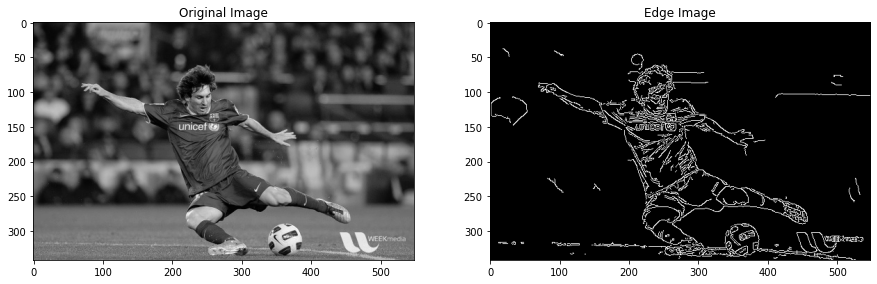

In [18]:
# A IMPLEMENTER EN FONCTION ET TESTER - SI BESOIN - FILTERING ET EDGE DETECTION
img = cv2.imread('../../data/messi.jpg', cv2.IMREAD_GRAYSCALE)
edge = cv2.Canny(img, 100, 200)
 
plt.figure()

plt.subplot(121)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(122)
plt.title('Edge Image')
plt.imshow(edge, cmap='gray')

# Quadrillage

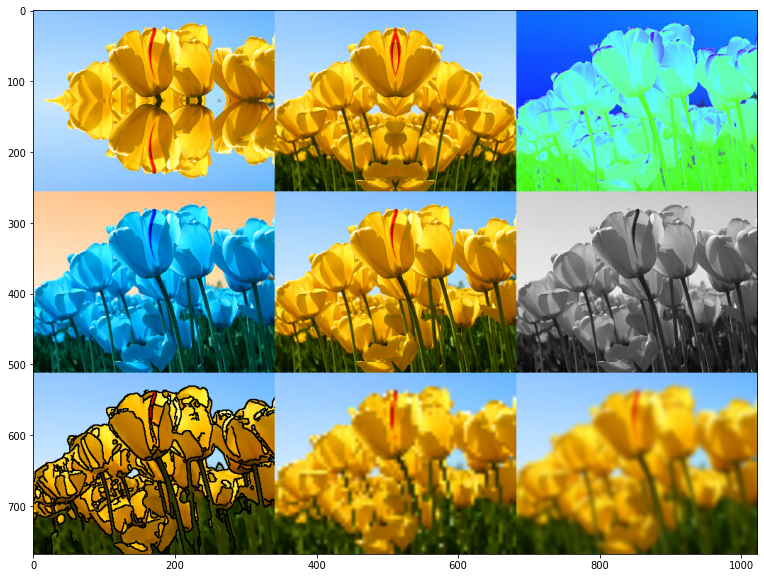

In [79]:
def quadrillage_filtre(image):
    '''Pour l'image donnée en entrée, la fonction affiche un quadrillage en 3 par 3 de l'image transformée par les filtres.
    Les filtres sont fournis en tant que liste de variables.'''
    
    list_filtres = [filtre_miroir_horiz,filtre_miroir_vertic,to_HSV,to_RGB,filtre_gray,filtre_cartoon,filtre_pixel,filtre_flou]

    newheight = image.shape[0]//3
    newwidth = image.shape[1]//3
    img_resized = cv2.resize(image, dsize=(newwidth,newheight)) # on resize l'image de départ en la divisant par 3. attention : width avant height
    quadrillage = np.zeros((img_resized.shape[0]*3, img_resized.shape[1]*3, 3), 'uint8') #création d'un quadrillage vide


    def no_filter(image): # on crée un filtre pour afficher l'image originale
        return image  

    filtres = list_filtres[:4] + [no_filter] + list_filtres[4:] # on veut que l'image originale soit au milieu du quadrillage
    for y in range(3): # pour chaque colonne
        for x in range(3): # pour chaque ligne
            filtre = filtres[3*y+x] # sélection du filtre à appliquer parmi la liste
            img_filtree = filtre(img_resized)
            quadrillage[y*newheight:(y+1)*newheight,x*newwidth:(x+1)*newwidth] = img_filtree

    return quadrillage

# TEST FONCTION
quadrillage = quadrillage_filtre(tulips)

plt.figure()
plt.imshow(quadrillage)

# Caméra

## Fonctions de base

In [86]:
def show_image(image):
    cv2.imshow('', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [91]:
def run_filter_on_camera(image_filter):
    cap = cv2.VideoCapture(-1)

    while(True):
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        # Our operations on the frame come here
        result_image = image_filter(frame)

        # Display the resulting frame
        cv2.imshow('frame', result_image)

        # We break out of the loop if the 'q' key is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

## Filtres dynamiques

In [92]:
def black_and_white(image):
    return_image = np.zeros((image.shape[0], image.shape[1], 3), np.uint8)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    return_image[:, :, 0] = gray
    return_image[:, :, 1] = gray
    return_image[:, :, 2] = gray
    
    return return_image

In [93]:
run_filter_on_camera(black_and_white)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to tar

In [94]:
run_filter_on_camera(quadrillage_filtre)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to target thread (0x562e0051d170)

QObject::moveToThread: Current thread (0x562e0051d170) is not the object's thread (0x562e04021da0).
Cannot move to tar